# **Notebook 2: Sales Price Study**

## Objectives

* Answer business requirement 1

  * The client is interested in predicting how house attributes correlate with the sale price of homes in Ames, Iowa.

  * Therefore, the client expects data visualizations of the correlated variables against the sale price.

* Some background information
  * The dataset is based on a historical features as well as sale price for each house.

  * This makes our target variable sale price.


## Tasks 

* Steps to Answer business requirement 1

    * Perform a correlation and/or PPS study to investigate the most relevant features correlating to the sale price.

    * Undertake Exploratory Data Analysis to better understand the dataset.

    * Follow up with a correlation study using the Pearson and Spearman method.

    * Extrapolate and use high ranked correlated features.

    * Conclusions and next steps.

## Inputs

* inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

## Ouputs

* Develop insight towards answering the clients business requirement.


## Additional Comments

* This notebook was informed and guided by the steps provided in the Customer Churn Walkthrough Porject.

* We intend to explore the data using the CRISP-DM Data methodology.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Housing-Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Housing-Predictive-Analytics'

---

# Import Packages

In [4]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

---

# Load House Price Records generated during data collection.

In [5]:
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
print(df.shape)
df.head()

(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration
* We can use a library called ydata_profiling to explore the dataset that will give us insights into the characteristics of each feature and the relationships they share with each other to see how it impacts the business requirement of predicting how house values correlate to the sale price of houses. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Correlation Study

We can use a library called pandas-profiling to explore the dataset which will give us insights into what value the features add to case of business requirement 1.

* We will use the spearman and pearson methods to assess correlation levels across the numeric values.

* We expect to exclude the first item returned as it will be the correlation between SalePrice and SalePrice.

* We will only retrieve the 10 most applicable correlations.

Using the 'spearman' method to measure the monochronic relationship between two features.

In [7]:
corr_spearman = df.corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

Using the 'pearson' method to measure the linear relationship between two features.

In [8]:

from sklearn.preprocessing import LabelEncoder
def preprocess_data(df):
    """ Preprocess data for correlation analysis """
    # Drop rows with missing values in numeric columns
    df = df.dropna(subset=['SalePrice'])
    
    # Handle non-numeric columns: Encode categorical variables
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = df[column].astype(str)  # Ensure all values are strings
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    return df

In [9]:
# Preprocess data
df = preprocess_data(df)
import numpy as np
    # Ensure the DataFrame only contains numeric columns
df_numeric = df.select_dtypes(include=[np.number])
    
    # Calculate Pearson Correlation
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
KitchenQual    -0.589189
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64

---

# Observations
* For both spearman and pearson methods we can see a strong correlation between Sales Price and at least 5 variables.

* Now we can take the top 5 variables produced by each method and transform them to a list and join them.

* Our result should be the top most correlated variables from both methods.

* We can set that results of 0.8 or more are considered strong correlation values, with 0.5 to 0.8 considered moderate in correlation.

In [10]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

* The result is 6 variables that correlate to Sales Price and they are all above at least 0.6.

* These variables will be tested on strength to predict sales price.


In [11]:
corr_var_list = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
corr_var_list

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 '1stFlrSF',
 'GarageArea']

---

# Exploration Data Analysis on the Correlated Variable List

* We now need to filter the house price dataset as per the correlated variable list and include the sale price.

In [12]:
df_eda = df.filter(corr_var_list + ['SalePrice'])
print(df_eda.shape)
df_eda.head(5)

(1460, 7)


,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,1stFlrSF,GarageArea,SalePrice
0,7,2003,856,1710,856,548,208500
1,6,1976,1262,1262,1262,460,181500
2,7,2001,920,1786,920,608,223500
3,7,1915,756,1717,961,642,140000
4,8,2000,1145,2198,1145,836,250000


---

# Variable Correlation to Sales Price Visualized

* We can now plot the distribution.

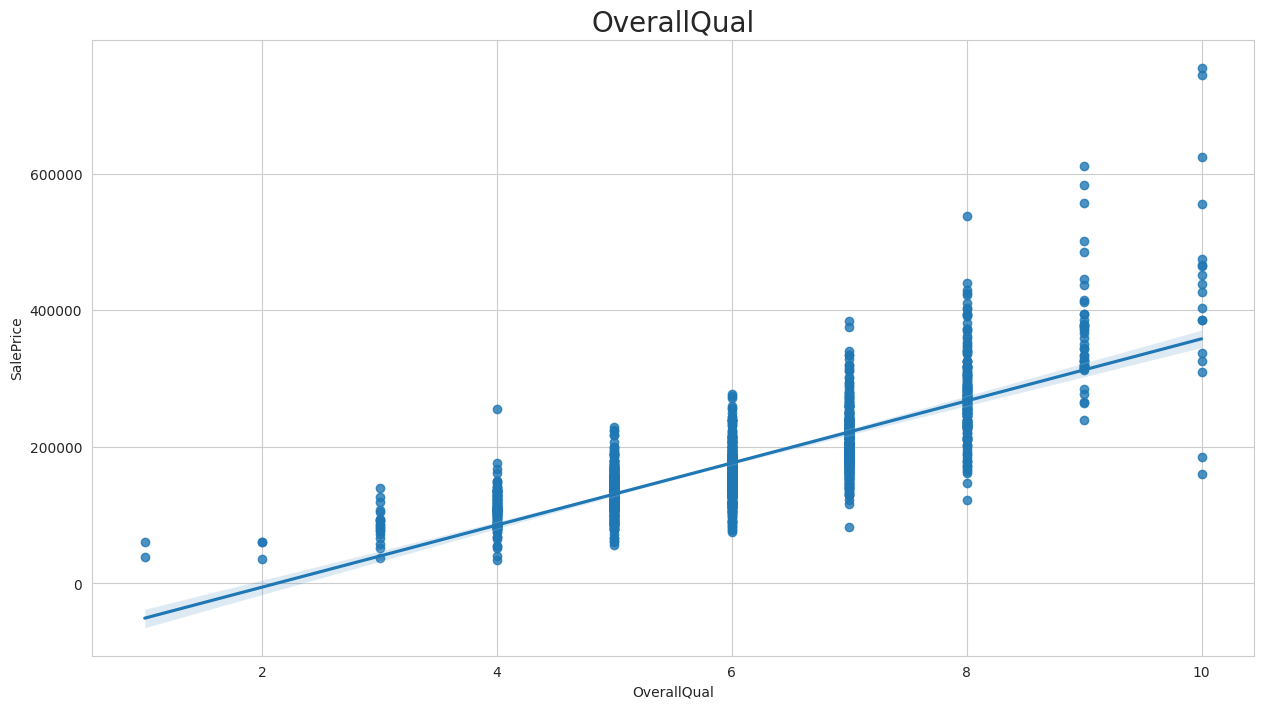

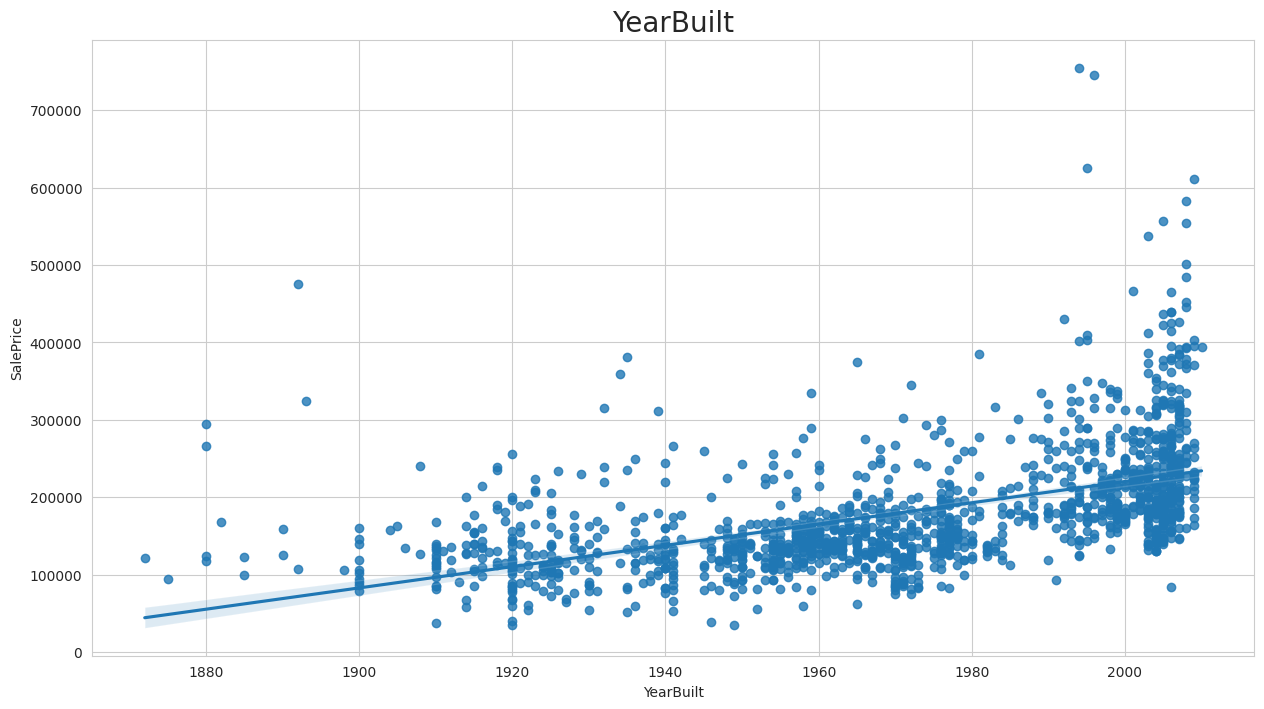

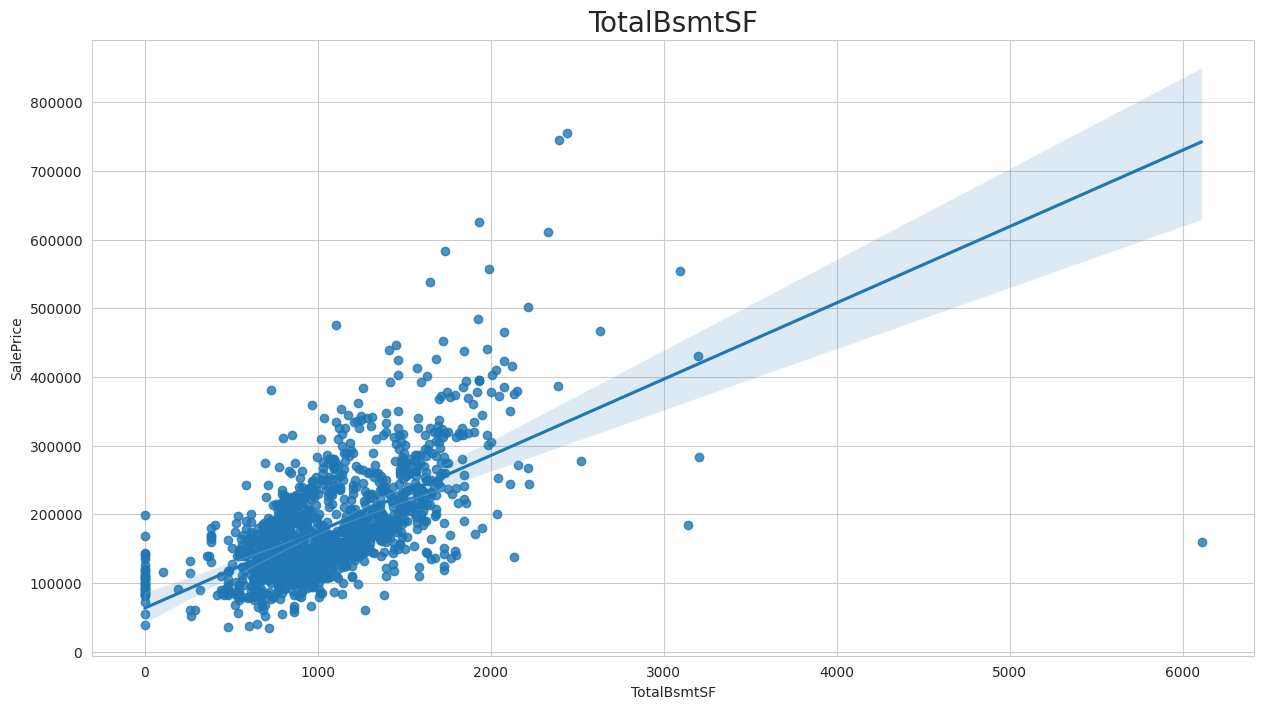

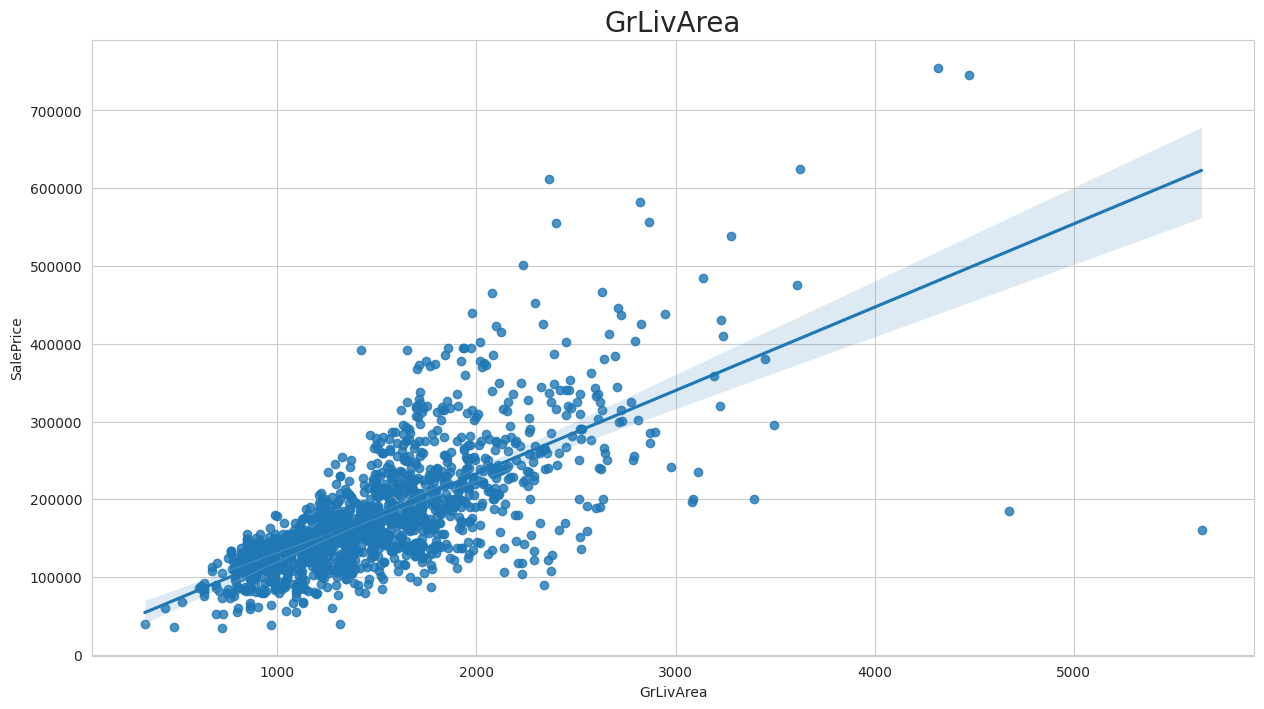

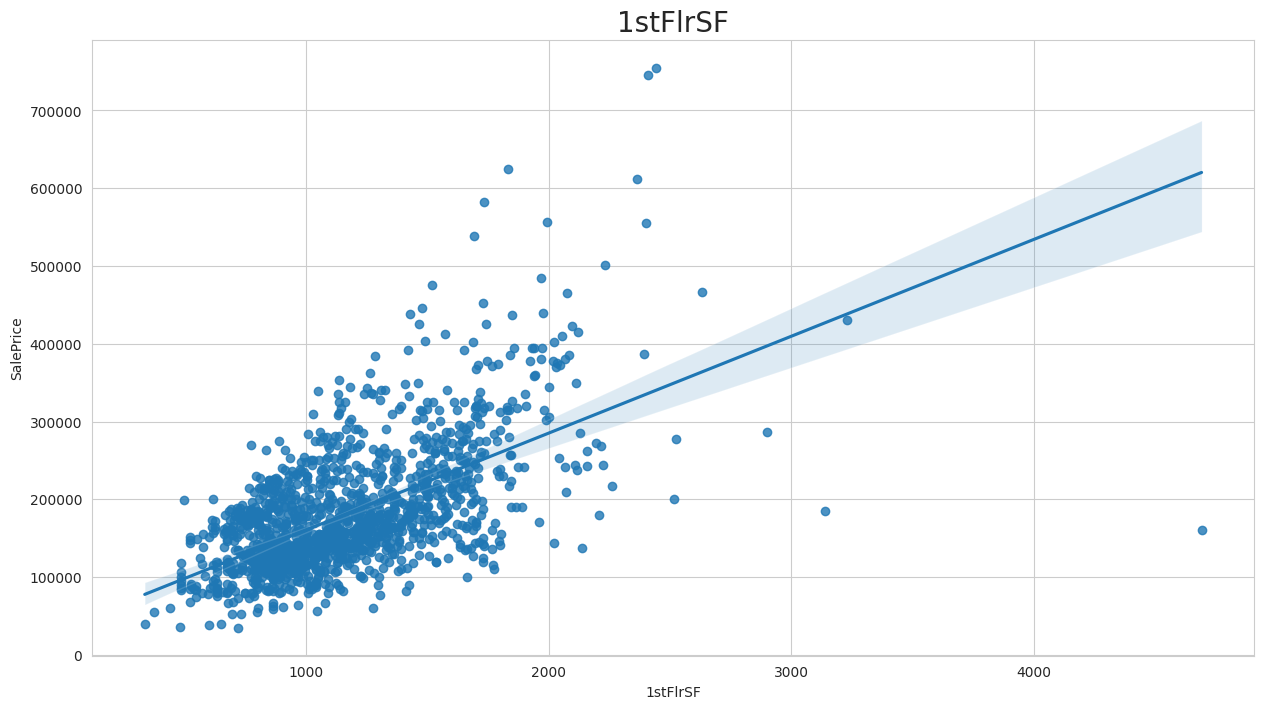

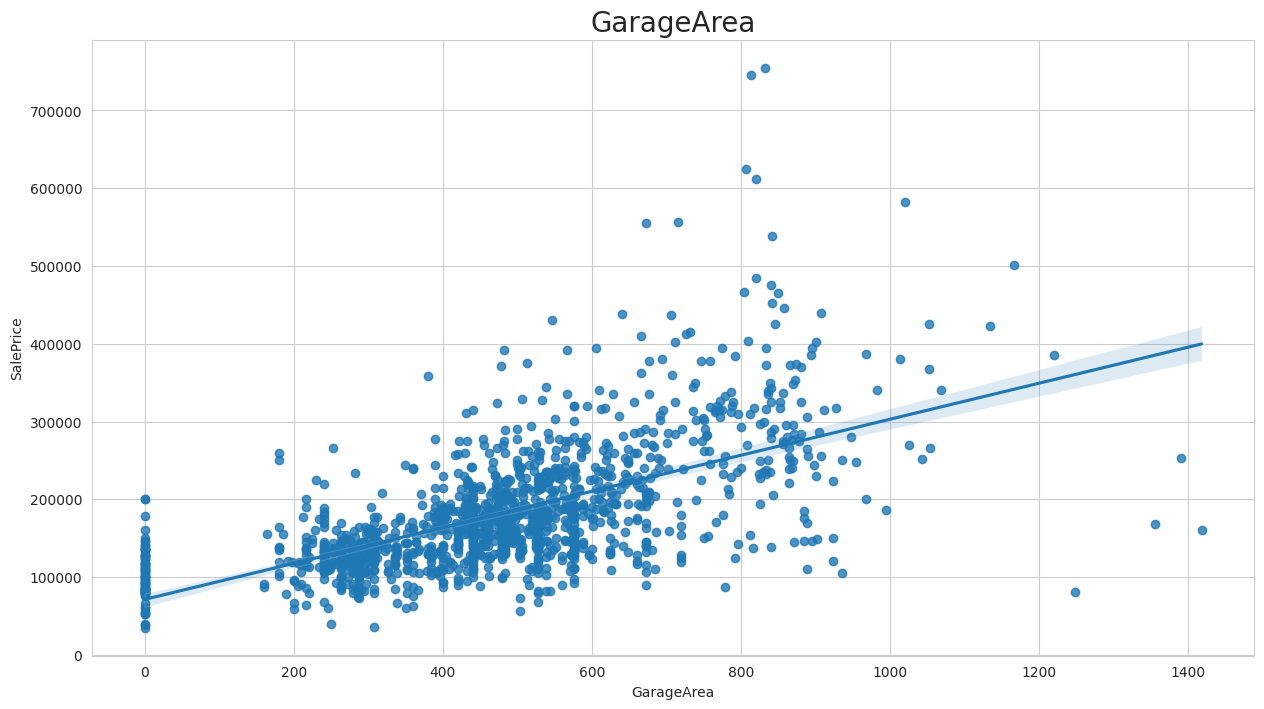

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in corr_var_list:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

---

# Conclusions and Steps to Follow

The correlations and plots interpretation converge.

The following are the variables isolated in the correlation study:

* 1stFlrSF: First Floor square feet

* GarageArea: Size of garage in square feet

* GrLivArea: Above grade (ground) living area square feet

* OverallQual: Rates the overall material and finish of the house

* YearBuilt: Original construction date

* TotalBsmtSF: Total square feet of basement area

*The above correlation analysis suggests that the size of the ground floor living area,basement and garage area, greatly influences the determination of the house price. Beyond this the year the house was built and the overall quality of materials used and the finishes in the house also influence the house price.

*The plots show that the variables, isolated in the correlation study, present a strong correlation and may have a strong predictive power for towards Sale Price.

*Having considered the above, we fail to reject the hypotheses set in the beginning.

We can now proceed to Data Cleaning as shown in the Walkthrough Project 2.